# Minimum vertex cover

This notebook illustrates how to find an approximated minimum vertex cover of a graph using the LP relaxation of an integer programming problem. 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy

Below we create a networkx graph by specifying the adjacency matrix of the graph:

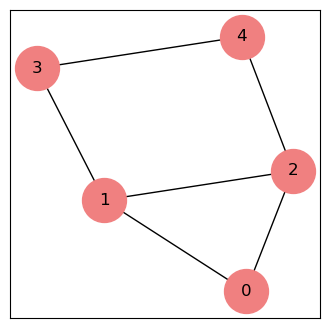

In [2]:
A = np.array([[0, 1, 1, 0, 0],
              [1, 0, 1, 1, 0],
              [1, 1, 0, 0, 1],
              [0, 1, 0, 0, 1],
              [0, 0, 1, 1, 0]
             ])

G = nx.from_numpy_array(A)
plt.figure(figsize=(4,4))
nx.draw_networkx(G, 
                 node_color="lightcoral", 
                 node_size=1000, 
                 pos=nx.spring_layout(G))

Since this is a small graph, it is easy to check that its minimum vertex cover consists of 3 vertices (we can take e.g. the vertices 1, 2, 3).

The function below computes an approximated minimum vertex cover of a graph and plots the graph with the cover vertices highlighted in blue. It also prints the solution of the LP relaxation problem. 

In [3]:
def lp_cover(G):
    """
    Computes an approximation of a minimum vertex cover 
    of a graph using LP relaxation of integer programming. 
    It plots the graph with vertex of the cover colored in 
    blue. It also prints the solution of the LP relaxation
    problem.  

    G:
        A networkx graph object

    Returns:
        None
    """
    incidence = nx.incidence_matrix(G).todense()
    A_ub = -incidence.T
    c = np.ones(A_ub.shape[1])
    b_ub = -np.ones(A_ub.shape[0])
    sp = scipy.optimize.linprog(c=c,
                                A_ub=A_ub,
                                b_ub=b_ub)
    print(sp.x)
    node_color = ['lightsteelblue' if x >= 0.5 else 'lightcoral' for x in sp.x]
    plt.figure(figsize=(4,4))
    nx.draw_networkx(G, 
                     node_color=node_color, 
                     node_size=1000, 
                     pos=nx.spring_layout(G)
                    )
    

Applying this function to the graph constructed above, we see that all vertices belong to the approximated cover. This is in line with the estimated number of vertices in the approximated cover: the actual minimum vertex cover consists of 3 vertices, and the approximated cover can have at most twice as many vertices.

[0.5 0.5 0.5 0.5 0.5]


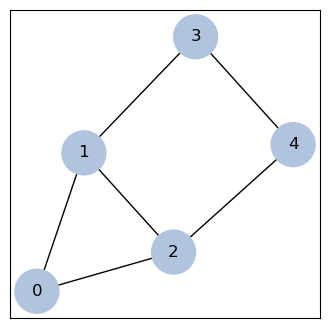

In [4]:
lp_cover(G)

Here is another graph. In this case a minimum vertex cover consists of a single vertex, the vertex 0.

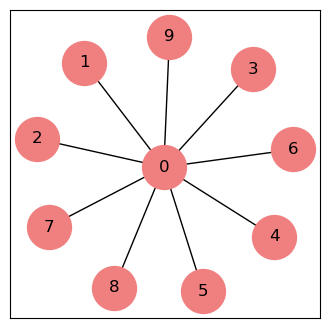

In [5]:
A = np.zeros([10, 10])
A[0, 1:] = 1
H = nx.from_numpy_array(A)
plt.figure(figsize=(4,4))
nx.draw_networkx(H, 
                 node_color="lightcoral", 
                 node_size=1000)

In this case the approximated cover is actually the same as the minimum cover:

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


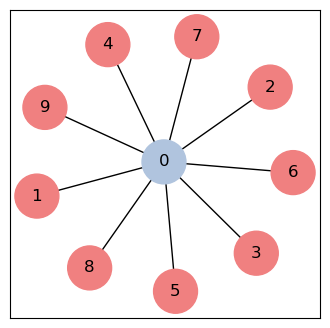

In [6]:
lp_cover(H)

The code below randomly generates a graph with `N` vertices. The argument `p` is the probability that a pair of vertices of the graph will be connected by a vertex. Each time this function is run it will produce as different graph and show its approximated vertex cover. 

In [7]:
def random_graph(N, p):
    A = np.random.random((N, N))
    A = (A < p).astype(int)
    A[np.r_[:N], np.r_[:N]] = 0
    K = nx.from_numpy_array(A)
    lp_cover(K)

[-0. -0.  1. -0.  1.  1. -0.  1.  0.  1.]


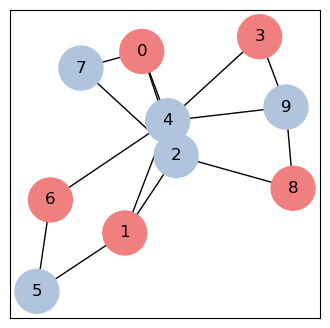

In [11]:
random_graph(N=10, p=0.2)

**Note.** The `networkx` library includes a function  [`networkx.algorithms.approximation.min_weighted_vertex_cover`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.vertex_cover.min_weighted_vertex_cover.html) which also gives an approximated minimum vertex cover that can have up to twice as many vertices as an actual minimum vertex cover:

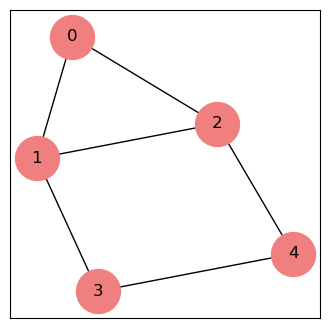

In [12]:
plt.figure(figsize=(4,4))
nx.draw_networkx(G, 

                 node_color="lightcoral", 
                 node_size=1000, 
                 pos=nx.spring_layout(G))

In [13]:
nx.algorithms.approximation.min_weighted_vertex_cover(G)

{0, 1, 2, 4}